<a href="https://colab.research.google.com/github/younhuiji/python/blob/main/py25_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#imporrt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# movielens 데이터 셋

* https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/movielens
* movies.dat: "MovieID::Title::Geners"을 컬럼으로 하는 데이터 셋. 영화 정보.
* ratings.dat:"UserID::MovieID::Rating::Timestamp"을 컬럼으로 하는 데이터 셋. 영화 별점.
* users.dat:"UserID::Gender::Age::Occupation::Zip-code"을 컬럼으로 하는 데이터 셋. 사용자 정보.

* movies.dat 파일을 읽고 DataFrame 생성 `pd.read_csv()` - `head, tail, info, ...`
* DataFrame 탐색
* 장르가 'Animation'인 영화는 몇 개? - genres(장르들) 컬럼의 문자열이 'Animation'을 포함.
* 장르가 로맨틱 코미디인 영화는 몇 개? - genres 컬럼의 문자열이 'Comedy'와 'Romance'를 포함.
* 어떤 장르의 영화가 가장 많은가? - genres의 문자열을 '|'를 구분자로 분리(split)
* 연도별 영화 수 - title 컬럼에 영화 개봉 연도가 포함.

In [ ]:
file_path = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/movies.dat'

In [ ]:
movie = pd.read_csv(file_path, sep='::', names=['movie_id','title', 'genres'], engine='python')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
movie.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movie.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


## 장르분석 - 애니메이션 찾기

In [ ]:
a=movie[movie['genres'].str.contains('Animation')]
a.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's


In [ ]:
len(a)

105

## 장르 분석 - 로맨틱 코미디 찾기

In [ ]:
c=movie[movie['genres'].str.contains('Romance') & movie['genres'].str.contains('Comedy')]
c.head()

,movie_id,title,genres,year
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
6,7,Sabrina (1995),Comedy|Romance,1995
10,11,"American President, The (1995)",Comedy|Drama|Romance,1995
38,39,Clueless (1995),Comedy|Romance,1995
63,64,Two if by Sea (1996),Comedy|Romance,1996


In [ ]:
len(c)

204

## 장르 분석 - 가장 빈번한 장르

In [ ]:
genres = [] # 개별 영화의 장르를 저장할 리스트
for genre in movie.genres:
    for g in genre.split('|'): # 1차원 리스트를 만들기 위해서.
        genres.append(g)
print('전체 장르 수:',len(genres))

genres_unique = pd.unique(genres)
print(genres_unique)
print('중복하지 않은 장르 수:', len(genres_unique))

전체 장르 수: 6408
['Animation' "Children's" 'Comedy' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical' 'Mystery' 'Film-Noir' 'Western']
중복하지 않은 장르 수: 18


In [ ]:
genres_counts = pd.value_counts(genres) # values의 내림차순 정렬.
genres_counts

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

빈도수 상위 7개 그래프 시각화

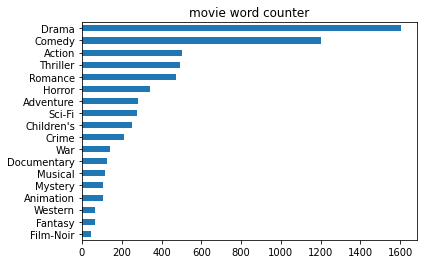

In [ ]:
# genres_counts.plot(kind='barh',title='movie word counter')

# 내림차순 정렬
genres_counts.sort_values().plot(kind='barh',title='movie word counter')
plt.show()

In [ ]:
genre_top7 = genres_counts.head(n=7) # iloc[:7]
genre_top7

Drama        1603
Comedy       1200
Action        503
Thriller      492
Romance       471
Horror        343
Adventure     283
dtype: int64

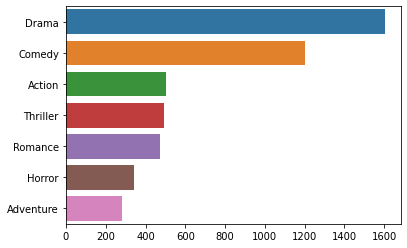

In [ ]:
sns.barplot(y=genre_top7.index, x=genre_top7.values)
plt.show()

## 연도별 영화 수

In [ ]:
movie.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# 데이터프레임에 파생변수(새로운 컬럼)을 추가
movie['year'] = movie.title.str[-5:-1].astype(int)
movie.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
year_counts = movie.year.value_counts()
year_counts

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

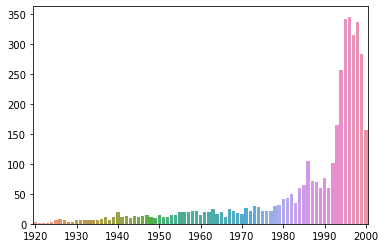

In [ ]:
sns.barplot(y=year_counts.values, x=year_counts.index)
plt.xticks(np.arange(0, 81, 10), np.arange(1920,2010,10))
plt.show()

# DataFrame 합치기(merge)

In [ ]:
# 데이터 파일의 GitHub 경로
movies_file = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/movies.dat'
ratings_file = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/ratings.dat'
users_file = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/users.dat'

In [ ]:
# 데이터 프레임의 컬럼 이름 정의
movies_colnames = ['movie_id', 'title', 'genres']
ratings_colnames = ['user_id', 'movie_id', 'rating','timestamp']
users_colnames = ['user_id', 'gender', 'age', 'occupation', 'zipcode']

In [ ]:
movies = pd.read_csv(movies_file, sep='::', engine='python', names=movies_colnames)

In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [ ]:
ratings = pd.read_csv(ratings_file, sep='::',engine='python',names=ratings_colnames)

In [ ]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings.tail()

,user_id,movie_id,rating,timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [ ]:
users = pd.read_csv(users_file, sep='::', engine='python', names=users_colnames)

In [ ]:
users.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users.tail()

,user_id,gender,age,occupation,zipcode
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


## ratings와 movies 데이터프레임을 marge

In [ ]:
df = pd.merge(ratings, movies)
# merge() 함수 : SQL JOIN문
# param how : join 방식. inner, left, right, outer. 기본값은 inner.
# param on : join을 할 때 사용할 컬럼(들)의 이름.

In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1000209 non-null  int64 
 1   movie_id   1000209 non-null  int64 
 2   rating     1000209 non-null  int64 
 3   timestamp  1000209 non-null  int64 
 4   title      1000209 non-null  object
 5   genres     1000209 non-null  object
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


## df와 users 데이터프레임을 merge

In [ ]:
df = pd.merge(df, users)

In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   title       1000209 non-null  object
 5   genres      1000209 non-null  object
 6   gender      1000209 non-null  object
 7   age         1000209 non-null  int64 
 8   occupation  1000209 non-null  int64 
 9   zipcode     1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


## 영화 별점 분석

In [ ]:
df.rating.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

## 별점 boxplot

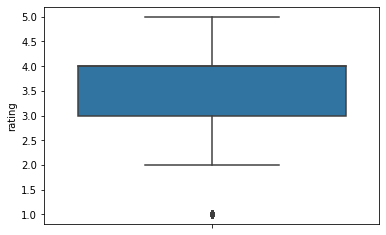

In [ ]:
sns.boxplot(data=df, y='rating')
plt.show()

## 별점 빈도수: count plot

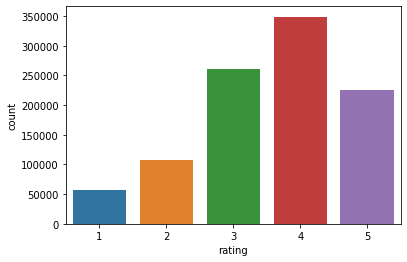

In [ ]:
sns.countplot(data=df, x='rating')
plt.show()

In [ ]:
rating_counts = df.rating.value_counts
rating_counts

<bound method IndexOpsMixin.value_counts of 0          5
1          3
2          3
3          4
4          5
          ..
1000204    2
1000205    3
1000206    4
1000207    2
1000208    2
Name: rating, Length: 1000209, dtype: int64>

## 성별 분석

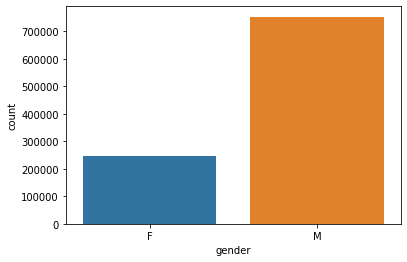

In [ ]:
# 영화 별점을 남긴 사용자들의 성비
sns.countplot(data=df, x='gender')
plt.show()


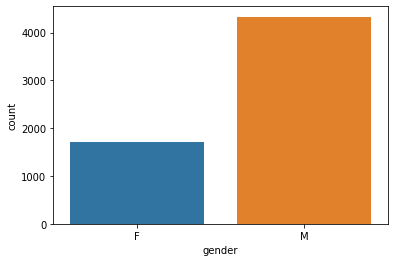

In [ ]:
#users 데이터프레임의 성비
sns.countplot(data=users, x='gender')
plt.show()

## 별점을 남긴 사용자의 연령대 분석

In [ ]:
df.age.value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: age, dtype: int64

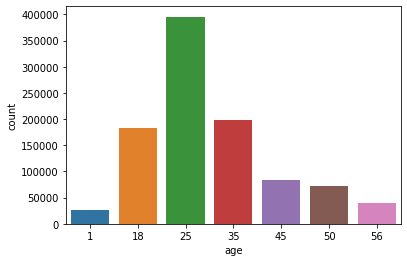

In [ ]:
sns.countplot(data=df, x='age')
plt.show()

# 직업군 분석

가장 별점을 많이 남긴 직업군 5개.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   title       1000209 non-null  object
 5   genres      1000209 non-null  object
 6   gender      1000209 non-null  object
 7   age         1000209 non-null  int64 
 8   occupation  1000209 non-null  int64 
 9   zipcode     1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [ ]:
occ = df.occupation.value_counts()
occ

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: occupation, dtype: int64

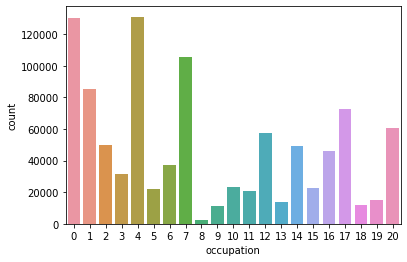

In [ ]:
sns.countplot(data=df, x='occupation')
plt.show()

# 영화 별점 평균 상위/하위 10개 영화 제목

In [ ]:
title = df.groupby('title').rating.mean()
title

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [ ]:
# 제목별 별점 평균을 평균값 내림차순 정렬
title_top10 = title.sort_values(ascending=False).head(n=10)
title_top10


title
Ulysses (Ulisse) (1954)                      5.0
Lured (1947)                                 5.0
Follow the Bitch (1998)                      5.0
Bittersweet Motel (2000)                     5.0
Song of Freedom (1936)                       5.0
One Little Indian (1973)                     5.0
Smashing Time (1967)                         5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Gate of Heavenly Peace, The (1995)           5.0
Baby, The (1973)                             5.0
Name: rating, dtype: float64

In [ ]:

# 제목별 별점 평균을 평균값 오름차순 정렬
title_under10 = title.sort_values(ascending=True).head(n=10)
title_under10

title
Elstree Calling (1930)                                        1.0
Get Over It (1996)                                            1.0
Venice/Venice (1992)                                          1.0
Windows (1980)                                                1.0
Kestrel's Eye (Falkens öga) (1998)                            1.0
McCullochs, The (1975)                                        1.0
Sleepover (1995)                                              1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Spring Fever USA (a.k.a. Lauderdale) (1989)                   1.0
Santa with Muscles (1996)                                     1.0
Name: rating, dtype: float64

In [ ]:
df[df.title=='Ulysses (Ulisse) (1954)']

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode
508633,3485,3172,5,967060437,Ulysses (Ulisse) (1954),Adventure,M,25,0,94121


In [ ]:
df[df.title=='Zeus and Roxanne (1997)']

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode
62361,869,1426,3,975278974,Zeus and Roxanne (1997),Children's,M,18,20,92026
129880,1697,1426,3,974734435,Zeus and Roxanne (1997),Children's,F,18,4,98052
130432,1701,1426,4,974708114,Zeus and Roxanne (1997),Children's,F,25,4,97233
150604,1941,1426,4,989642527,Zeus and Roxanne (1997),Children's,M,35,17,94550
167162,2106,1426,2,975131270,Zeus and Roxanne (1997),Children's,F,18,20,495321
234176,3224,1426,3,968520566,Zeus and Roxanne (1997),Children's,F,25,14,93428
303088,4048,1426,4,965500873,Zeus and Roxanne (1997),Children's,F,35,1,89431
310628,4150,1426,2,965344367,Zeus and Roxanne (1997),Children's,M,25,0,29672
429906,5698,1426,2,958595285,Zeus and Roxanne (1997),Children's,M,35,14,55418
478984,1434,1426,1,974846211,Zeus and Roxanne (1997),Children's,F,1,10,495321


별점의 개수가 1~2개 밖에 없는 영화들의 별점 평균은 큰 의미가 없을 것 같다.
일정 개수(예: 10개, 30개, 100개, ...) 이상의 별점 건수가 있는 영화들을 선택해서 별점 평균 분석을 하는 것이 더 의미가 있을 것 같다.

In [ ]:
# 영화 제목별 별점 개수
title_counts = df.title.value_counts()
title_counts.head(10)

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: title, dtype: int64

In [ ]:
title_counts.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: title, dtype: float64

150건 이상의 별점을 가진 영화들만 별점 평균 분석

In [ ]:
# 150건 이상의 별점 리뷰가 있는 영화 제목들
indexer = title_counts[title_counts >= 150].index

In [ ]:
title.loc['American Beauty (1999)']

4.3173862310385065

In [ ]:
by_title_150 = title.loc[indexer]
by_title_150

American Beauty (1999)                                     4.317386
Star Wars: Episode IV - A New Hope (1977)                  4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)      4.292977
Star Wars: Episode VI - Return of the Jedi (1983)          4.022893
Jurassic Park (1993)                                       3.763847
                                                             ...   
Asphalt Jungle, The (1950)                                 3.927152
Tales from the Crypt Presents: Bordello of Blood (1996)    2.589404
Golden Voyage of Sinbad, The (1974)                        3.397351
In the Army Now (1994)                                     2.225166
Police Academy 5: Assignment: Miami Beach (1988)           1.766667
Name: rating, Length: 1683, dtype: float64

별점 리뷰 150건 이상의 영화들 중에서 별점 평균 상위 10개 영화 제목

In [ ]:
by_title_150.sort_values(ascending=False).head(n=10)

Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Rear Window (1954)                                                     4.476190
Name: rating, dtype: float64

별점 리뷰 150건 이상을 갖는 영화들 중에서 별점 평균 하위 10개 영화 제목

In [ ]:
by_title_150.sort_values().head(n=10)

Battlefield Earth (2000)                            1.611111
Baby Geniuses (1999)                                1.701220
Police Academy 5: Assignment: Miami Beach (1988)    1.766667
Stop! Or My Mom Will Shoot (1992)                   1.782123
Jaws 3-D (1983)                                     1.852381
Speed 2: Cruise Control (1997)                      1.871935
Spice World (1997)                                  1.873684
Super Mario Bros. (1993)                            1.874286
Home Alone 3 (1997)                                 1.876623
Superman IV: The Quest for Peace (1987)             1.888554
Name: rating, dtype: float64

##  성별 영화 선호도 차이?

성별, 영화 제목별 별점의 평균

In [ ]:
gender_df = df.groupby(['title', 'gender']).rating.mean()
gender_df

title                                       gender
$1,000,000 Duck (1971)                      F         3.375000
                                            M         2.761905
'Night Mother (1986)                        F         3.388889
                                            M         3.352941
'Til There Was You (1997)                   F         2.675676
                                                        ...   
Zero Kelvin (Kjærlighetens kjøtere) (1995)  M         3.500000
Zeus and Roxanne (1997)                     F         2.777778
                                            M         2.357143
eXistenZ (1999)                             F         3.098592
                                            M         3.289086
Name: rating, Length: 7152, dtype: float64

* `unstack()`: 행의 인덱스를 컬럼 이름으로 변환.
* `stack()` : 컬럼 이름을 행의 인덱스로 변환.

In [ ]:
gender_df.unstack()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [ ]:
by_gender = df.groupby(['title', 'gender']).rating.mean().unstack()

In [ ]:
# 피벗 테이블
# param values : 피벗 테이블의 각 셀에 채울 값으로 사용할 컬럼 이름.
# param index : 피벗 테이블의 (행) 인덱스로 사용할 컬럼 이름.
# param columns : 피벗 테이블의 컬럼 이름.
# param aggfunc : values을 계산할 함수. 기본 값은 평균. 
df.pivot_table(values='rating', index='title', columns='gender', aggfunc=np.mean)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [ ]:
# 제목별 연령대별 별점 평균1
df.groupby(['title', 'age']).rating.mean().unstack()


age,1,18,25,35,45,50,56
title,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN
'Night Mother (1986),2.000000,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.500000,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.500000,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.000000,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571
...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",1.000000,3.000000,3.375000,3.777778,4.000000,3.000000,NaN
Zero Effect (1998),4.125000,3.883333,3.715278,3.608696,3.764706,3.833333,3.625000
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,NaN,NaN,3.500000,NaN,NaN,NaN


In [ ]:
# 제목별 연령대별 별점 평균2
df.pivot_table(values='rating', index='title', columns='age', aggfunc=np.mean)

age,1,18,25,35,45,50,56
title,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN
'Night Mother (1986),2.000000,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.500000,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.500000,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.000000,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571
...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",1.000000,3.000000,3.375000,3.777778,4.000000,3.000000,NaN
Zero Effect (1998),4.125000,3.883333,3.715278,3.608696,3.764706,3.833333,3.625000
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,NaN,NaN,3.500000,NaN,NaN,NaN


In [ ]:
# 150건 이상의 별점 리뷰를 갖고 있는 영화들에서 성별 별점 평균
by_gender_150 = by_gender.loc[indexer]
by_gender_150

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
"Asphalt Jungle, The (1950)",3.571429,4.008130
Tales from the Crypt Presents: Bordello of Blood (1996),2.727273,2.565891
"Golden Voyage of Sinbad, The (1974)",3.157895,3.431818
In the Army Now (1994),2.384615,2.192000


In [ ]:
# 여성 별점 평균 상위 10개 영화
by_gender_150.sort_values(by='F', ascending=False).head(n=10)

gender,F,M
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
"General, The (1927)",4.575758,4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


In [ ]:
# 남성 별점 평균 상위 10개 영화
by_gender_150.sort_values(by='M', ascending=False).head(n=10)

gender,F,M
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


# 영화 장르 분석

* 50건 이상의 별점 리뷰를 갖는 영화들 중에서 
    * 별점 평균이 4.0 이상인 영화들의 장르 상위 10개
    * 성별 별점 평균이 4.0 이상인 영화들의 장르 상위 10개
    * 연령대별(18 +, 25+, 35+ ) 별점 평균이 4.0 이상인 영화들의 장르 상위 10개 

## 장르 빈도수 상위 10개

In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [ ]:
title_counts = df.title.value_counts()
title_counts

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Waiting Game, The (2000)                                    1
Shadows (Cienie) (1988)                                     1
Juno and Paycock (1930)                                     1
Resurrection Man (1998)                                     1
Windows (1980)                                              1
Name: title, Length: 3706, dtype: int64

In [ ]:
# 별점 리뷰가 50개 이상인 영화 제목
indexer1 = title_counts[title_counts >= 50].index
indexer1

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Crossing Guard, The (1995)', 'Heidi Fleiss: Hollywood Madam (1995)',
       'Thousand Acres, A (1997)', 'Jude (1996)', 'Hear My Song (1991)',
       'House Arrest (1996)', 'Washington Square (1997)',
       'Love Is a Many-Splendored Thing (1955)', 'Associate, The (1996)',
       'Myth of Fingerprints, The (1997)'],
      dtype='object', length=2514)

In [ ]:
by_title = df.groupby('title').rating.mean()
by_title

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [ ]:
by_title_50 = by_title.loc[indexer1]
by_title_50

American Beauty (1999)                                   4.317386
Star Wars: Episode IV - A New Hope (1977)                4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)    4.292977
Star Wars: Episode VI - Return of the Jedi (1983)        4.022893
Jurassic Park (1993)                                     3.763847
                                                           ...   
House Arrest (1996)                                      2.560000
Washington Square (1997)                                 3.340000
Love Is a Many-Splendored Thing (1955)                   3.260000
Associate, The (1996)                                    3.000000
Myth of Fingerprints, The (1997)                         3.000000
Name: rating, Length: 2514, dtype: float64

In [ ]:
over4 = by_title_50[by_title_50 >= 4.0]
over4

American Beauty (1999)                                   4.317386
Star Wars: Episode IV - A New Hope (1977)                4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)    4.292977
Star Wars: Episode VI - Return of the Jedi (1983)        4.022893
Saving Private Ryan (1998)                               4.337354
                                                           ...   
Children of Heaven, The (Bacheha-Ye Aseman) (1997)       4.163934
Maya Lin: A Strong Clear Vision (1994)                   4.101695
Conformist, The (Il Conformista) (1970)                  4.228070
World of Apu, The (Apur Sansar) (1959)                   4.410714
Lonely Are the Brave (1962)                              4.000000
Name: rating, Length: 330, dtype: float64

In [ ]:
movies_idx = movies.set_index('title') # title 컬럼을 인덱스로 만듦.
movies_idx

,movie_id,genres
title,,
Toy Story (1995),1,Animation|Children's|Comedy
Jumanji (1995),2,Adventure|Children's|Fantasy
Grumpier Old Men (1995),3,Comedy|Romance
Waiting to Exhale (1995),4,Comedy|Drama
Father of the Bride Part II (1995),5,Comedy
...,...,...
Meet the Parents (2000),3948,Comedy
Requiem for a Dream (2000),3949,Drama
Tigerland (2000),3950,Drama


In [ ]:
movies_idx.reset_index() # reset

,title,movie_id,genres
0,Toy Story (1995),1,Animation|Children's|Comedy
1,Jumanji (1995),2,Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),3,Comedy|Romance
3,Waiting to Exhale (1995),4,Comedy|Drama
4,Father of the Bride Part II (1995),5,Comedy
...,...,...,...
3878,Meet the Parents (2000),3948,Comedy
3879,Requiem for a Dream (2000),3949,Drama
3880,Tigerland (2000),3950,Drama
3881,Two Family House (2000),3951,Drama


In [ ]:
result1 = movies_idx.loc[over4.index]
result1.head()

,movie_id,genres
American Beauty (1999),2858,Comedy|Drama
Star Wars: Episode IV - A New Hope (1977),260,Action|Adventure|Fantasy|Sci-Fi
Star Wars: Episode V - The Empire Strikes Back (1980),1196,Action|Adventure|Drama|Sci-Fi|War
Star Wars: Episode VI - Return of the Jedi (1983),1210,Action|Adventure|Romance|Sci-Fi|War
Saving Private Ryan (1998),2028,Action|Drama|War


In [ ]:
genres = []
for x in result1.genres:
    genres.extend(x.split('|'))
print(genres)

['Comedy', 'Drama', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Action', 'Adventure', 'Drama', 'Sci-Fi', 'War', 'Action', 'Adventure', 'Romance', 'Sci-Fi', 'War', 'Action', 'Drama', 'War', 'Action', 'Sci-Fi', 'Thriller', 'Action', 'Sci-Fi', 'Thriller', 'Drama', 'Thriller', 'Action', 'Adventure', 'Crime', 'Drama', 'Thriller', 'Thriller', 'Action', 'Drama', 'War', 'Comedy', 'Romance', 'Action', 'Adventure', 'Comedy', 'Romance', 'Drama', 'War', 'Crime', 'Film-Noir', 'Mystery', 'Thriller', 'Comedy', 'Drama', 'Action', 'Crime', 'Drama', 'Comedy', 'Romance', 'War', 'Crime', 'Drama', 'Action', 'Sci-Fi', 'Thriller', 'Animation', "Children's", 'Comedy', 'Action', 'Horror', 'Sci-Fi', 'Thriller', 'Action', 'Thriller', 'Action', 'Drama', 'Action', 'Sci-Fi', 'Thriller', 'War', 'Film-Noir', 'Sci-Fi', 'Adventure', 'Comedy', 'Drama', 'Crime', 'Thriller', 'Drama', 'Adventure', "Children's", 'Drama', 'Musical', 'Drama', 'Mystery', 'Sci-Fi', 'Thriller', 'Action', 'Horror', 'Action', 'Crime', 'Drama', 'D

In [ ]:
gerens_counts = pd.value_counts(genres)

In [ ]:
result2 = genres_counts.head(n=10)

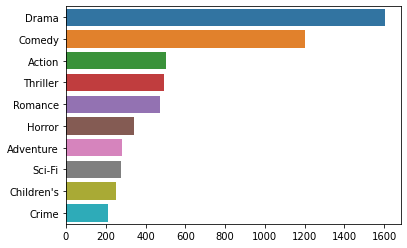

In [ ]:
sns.barplot(x=result2.values, y=result2.index)
plt.show()

## 성별 장르 빈도수 10개

In [ ]:
df.groupby(['title','gender']).rating.mean().unstack()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [ ]:
by_gender = df.pivot_table(values='rating', index='title', columns='gender')
by_gender

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [ ]:
by_gender_50 = by_gender.loc[indexer1]
by_gender_50

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
House Arrest (1996),2.583333,2.552632
Washington Square (1997),3.520000,3.160000
Love Is a Many-Splendored Thing (1955),3.555556,2.913043
"Associate, The (1996)",3.500000,2.718750


In [ ]:
female_over4 = by_gender_50[by_gender_50['F'] >= 4.0]
female_over4

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Saving Private Ryan (1998),4.114783,4.398941
"Matrix, The (1999)",4.128405,4.362235
...,...,...
"Inspector General, The (1949)",4.076923,3.414634
Stalker (1979),4.000000,3.586957
"Horseman on the Roof, The (Hussard sur le toit, Le) (1995)",4.050000,3.343750
"Trial, The (Le Procès) (1963)",4.444444,3.833333


In [ ]:
result2 = movies_idx.loc[female_over4.index]

In [ ]:
genres = []
for x in result2.genres:
    genres.extend(x.split('|'))

In [ ]:
genres_Female_top10 =  pd.value_counts(genres).head(10)
genres_Female_top10

Drama          189
Comedy          98
Romance         52
Thriller        43
War             35
Action          27
Mystery         23
Crime           22
Musical         19
Documentary     19
dtype: int64

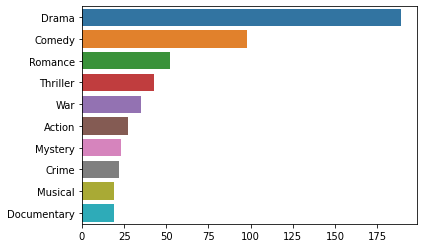

In [ ]:
sns.barplot(x=genres_Female_top10.values, y=genres_Female_top10.index)
plt.show()

In [ ]:
male_over4 = by_gender_50[by_gender_50['M']>=4.0]
male_over4

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Saving Private Ryan (1998),4.114783,4.398941
...,...,...
Maya Lin: A Strong Clear Vision (1994),4.105263,4.100000
"Conformist, The (Il Conformista) (1970)",4.285714,4.209302
"World of Apu, The (Apur Sansar) (1959)",4.842105,4.189189
Four Days in September (1997),3.785714,4.054054


In [ ]:
result3 = movies_idx.loc[male_over4.index]
result3

,movie_id,genres
American Beauty (1999),2858,Comedy|Drama
Star Wars: Episode IV - A New Hope (1977),260,Action|Adventure|Fantasy|Sci-Fi
Star Wars: Episode V - The Empire Strikes Back (1980),1196,Action|Adventure|Drama|Sci-Fi|War
Star Wars: Episode VI - Return of the Jedi (1983),1210,Action|Adventure|Romance|Sci-Fi|War
Saving Private Ryan (1998),2028,Action|Drama|War
...,...,...
Maya Lin: A Strong Clear Vision (1994),759,Documentary
"Conformist, The (Il Conformista) (1970)",2925,Drama
"World of Apu, The (Apur Sansar) (1959)",670,Drama
Four Days in September (1997),1759,Drama


In [ ]:
genres = []
for x in result3.genres:
    genres.extend(x.split('|'))

In [ ]:
genres_male_top10 = pd.value_counts(genres).head(10)
genres_male_top10

Drama        160
Comedy        86
Thriller      49
Action        41
Romance       39
War           37
Crime         27
Sci-Fi        20
Adventure     19
Film-Noir     19
dtype: int64

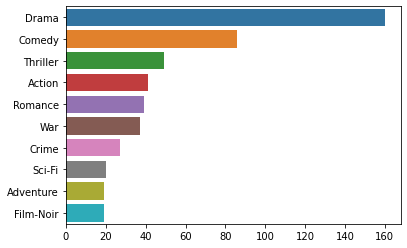

In [ ]:
sns.barplot(x=genres_male_top10.values, y=genres_male_top10.index)
plt.show()

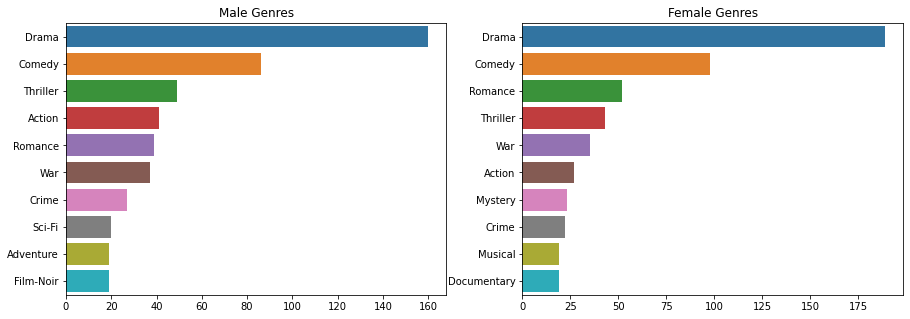

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.barplot(x=genres_male_top10.values, y=genres_male_top10.index, ax=ax[0])
sns.barplot(x=genres_Female_top10.values, y=genres_Female_top10.index, ax=ax[1])

ax[0].set_title('Male Genres')
ax[1].set_title('Female Genres')

plt.show()

## 연령대 장르 빈도수 상위 10개

In [ ]:
by_age = df.pivot_table(values='rating', index='title', columns='age')
by_age

age,1,18,25,35,45,50,56
title,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN
'Night Mother (1986),2.000000,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.500000,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.500000,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.000000,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571
...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",1.000000,3.000000,3.375000,3.777778,4.000000,3.000000,NaN
Zero Effect (1998),4.125000,3.883333,3.715278,3.608696,3.764706,3.833333,3.625000
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,NaN,NaN,3.500000,NaN,NaN,NaN
